In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

In [2]:
np.random.seed(987)

In [3]:
b = 1
m = 2
x = np.linspace(0,1)
y_pure = b + m*x

sigma = 0.1
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0])

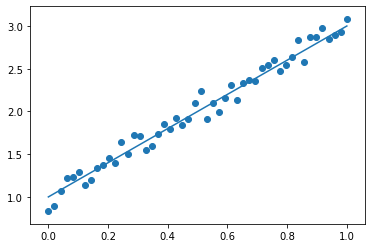

In [4]:
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

In [5]:
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
cov_likelihood = sigma**2*np.eye(x.shape[0])

my_prior = multivariate_normal(mean_prior, cov_prior)
my_loglike = tda.LogLike(y, cov_likelihood)

In [6]:
class MyCoarseLinkFactory(tda.LinkFactory):
    def evaluate_model(self, parameters):
        output = parameters[0] + parameters[1]*x + 0.01
        qoi = None
        return output, qoi

In [7]:
class MyFineLinkFactory(tda.LinkFactory):
    def evaluate_model(self, parameters):
        output = parameters[0] + parameters[1]*x
        qoi = None
        return output, qoi

In [8]:
my_link_factory_coarse = MyCoarseLinkFactory(my_prior, my_loglike)
my_link_factory_fine = MyFineLinkFactory(my_prior, my_loglike)

In [9]:
#rwmh_cov = np.eye(2)
#rmwh_scaling = 0.1
#rwmh_adaptive = True
#my_proposal = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

pcn_scaling = 0.1
pcn_adaptive = True
my_proposal = tda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

#am_cov = np.eye(2)
#am_t0 = 2000
#am_sd = 1
#am_epsilon = 1e-6
#my_proposal = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

In [10]:
my_chain = tda.ParallelDAChain(my_link_factory_coarse, my_link_factory_fine, my_proposal, subsampling_rate=10)

2021-06-30 15:49:29,399	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265


In [11]:
my_chain.sample(2500)

(pid=810992) /home/mikkel/OneDrive/Projects/tinyDA/git/tinyDA/proposal.py:183: RuntimeWarning: overflow encountered in exp
(pid=810992)   return np.exp(proposal_link.likelihood - previous_link.likelihood)
(pid=810998) /home/mikkel/OneDrive/Projects/tinyDA/git/tinyDA/proposal.py:183: RuntimeWarning: overflow encountered in exp
(pid=810998)   return np.exp(proposal_link.likelihood - previous_link.likelihood)


In [12]:
burnin = 500

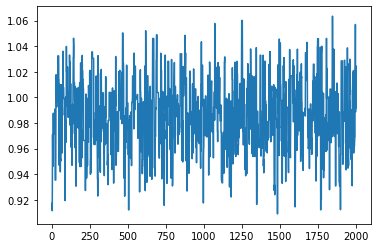

In [13]:
plt.plot([link.parameters[0] for link in my_chain.chains[0][burnin:]])

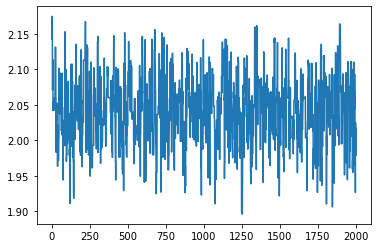

In [14]:
plt.plot([link.parameters[1] for link in my_chain.chains[0][burnin:]])

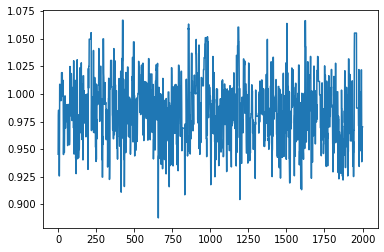

In [15]:
plt.plot([link.parameters[0] for link in my_chain.chains[1][burnin:]])

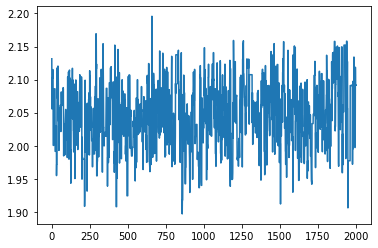

In [16]:
plt.plot([link.parameters[1] for link in my_chain.chains[1][burnin:]])